# DSP Assignment-2: Transform Analysis

## 設定 z transform

$$
H(z) =
\underbrace{\frac{\left(1 - 0.98e^{j 0.8\pi}z^{-1}\right)\left(1 - 0.98e^{-j 0.8\pi}z^{-1}\right)}
{\left(1 - 0.8e^{j 0.4\pi}z^{-1}\right)\left(1 - 0.8e^{-j 0.4\pi}z^{-1}\right)}}_{H_1(z)}
\underbrace{\prod_{k=1}^{4} \left(\frac{\left(c_k^* - z^{-1}\right)\left(c_k - z^{-1}\right)}
{\left(1 - c_k z^{-1}\right)\left(1 - c_k^* z^{-1}\right)}\right)^2}_{H_2(z)}
$$

with $c_k = 0.95e^{j\left(0.15\pi + 0.02\pi k\right)}$ for \( k = 1, 2, 3, 4 \). Fig. 5.2 displays the pole-zero plot.

$w$ 的範圍設定在 [−π, 𝜋]

$z$ 設定為 $e^{jw}$

之後分別去計算 $H_1(z)$ & $H_2(z)$

其中 $c_k = 0.95 e^{j(0.15\pi + 0.02\pi k)}$ for k = 1, 2, 3, 4

$H(z) = H_1(z) * H_2(z)$

np.linspace用法：

numpy.linspace 用於創建一個一維的array，並且它是一個等差數列的結構，格式：

`np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)`


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, zpk2tf

# z = e^(jω)
omega = np.linspace(-np.pi, np.pi, 44100)
z = np.exp(1j * omega)

# H1(z)
H1 = ((1 - 0.98 * np.exp(1j * 0.8 * np.pi) / z) * (1 - 0.98 * np.exp(-1j * 0.8 * np.pi) / z)) / \
     ((1 - 0.8 * np.exp(1j * 0.4 * np.pi) / z) * (1 - 0.8 * np.exp(-1j * 0.4 * np.pi) / z))

# H2(z)
k_values = [1, 2, 3, 4]
H2 = 1
for k in k_values:
    ck = 0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * k))
    H2 *= (((np.conj(ck) - 1 / z) * (ck - 1 / z)) / ((1 - ck / z) * (1 - np.conj(ck) / z))) **2

H = H1 * H2

## 1. Phase (principal value and continuous phase)

np.angle用法：

用於計算複數數值的相位

`numpy.angle(z, deg=False)`

np.unwrap用法：

用於對相位進行相位展開

`numpy.unwrap(p, discont=π, axis=-1)`

要加50是因為計算出來的范為大概是 [0, -100] ，所以加上50才會跟範例圖片一樣



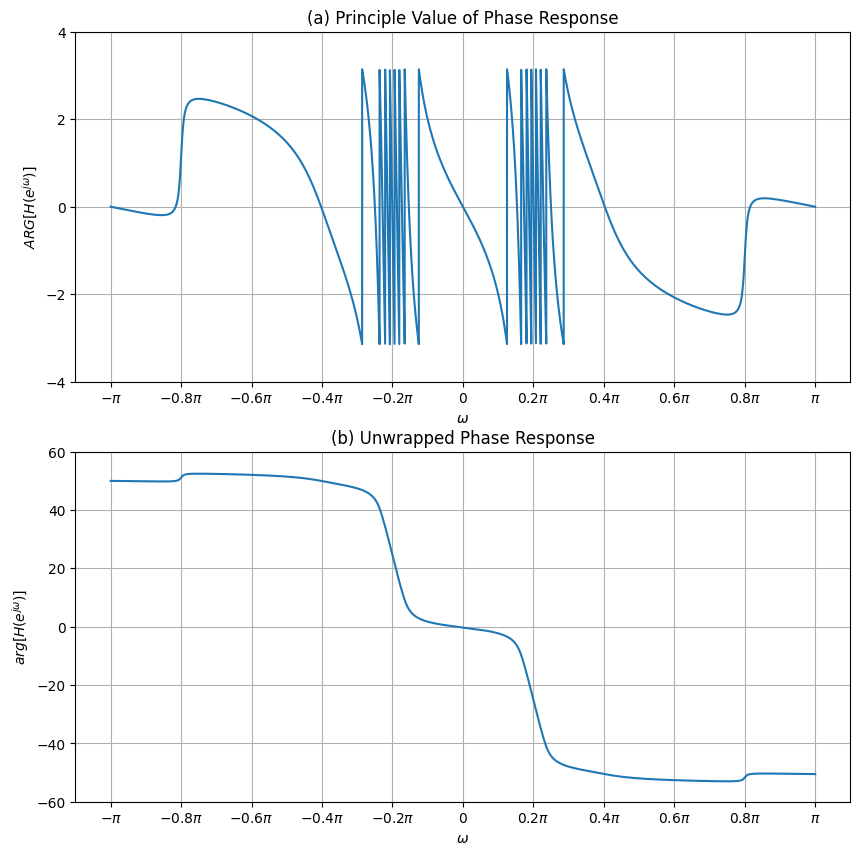

In [31]:
principal_phase = np.angle(H)
continuous_phase = np.unwrap(principal_phase) + 50

plt.figure(figsize=(10, 10))
# a圖： Principle Value of Phase Response
plt.subplot(2, 1, 1)
plt.plot(omega, principal_phase)
plt.title("(a) Principle Value of Phase Response")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$ARG[H(e^{j\omega})]$")
plt.xticks(ticks=[-np.pi, -np.pi*0.8, -np.pi*0.6, -np.pi*0.4, -np.pi*0.2, 0, np.pi*0.2, np.pi*0.4, np.pi*0.6, np.pi*0.8, np.pi],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.yticks(ticks=[-4, -2, 0, 2, 4])
plt.grid()

# b圖： Unwrapped Phase Response
plt.subplot(2, 1, 2)
plt.plot(omega, continuous_phase)
plt.title("(b) Unwrapped Phase Response")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$arg[H(e^{j\omega})]$")
plt.xticks(ticks=[-np.pi, -np.pi*0.8, -np.pi*0.6, -np.pi*0.4, -np.pi*0.2, 0, np.pi*0.2, np.pi*0.4, np.pi*0.6, np.pi*0.8, np.pi],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.yticks(ticks=range(-60, 61, 20))
plt.grid()

plt.show()

## 2. Group delay & magnitude

`np.abs(H)`：計算 $H(z)$ 的振幅

`magnitude /= np.max(magnitude) / 2`：為了讓範圍跟範例相同，所以做正規化範圍 [0, 2]

`np.gradient(continuous_phase, frequencies)`：用來計算

$$
Group Delay = -\frac{\partial \angle H(e^{j\omega})}{\partial \omega}
$$

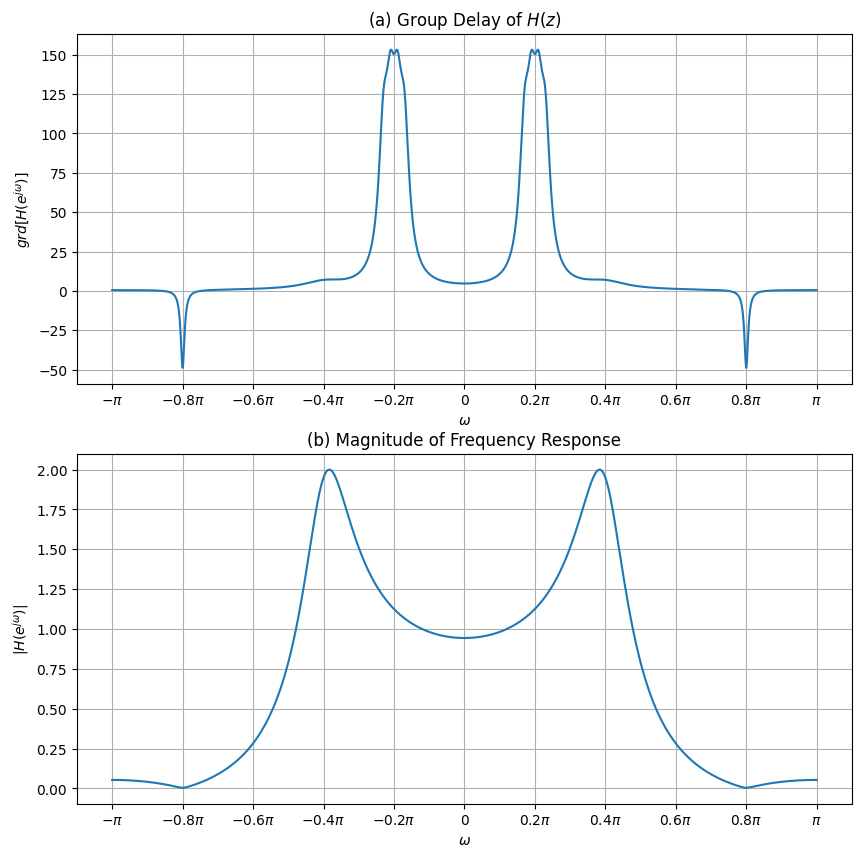

In [32]:
magnitude = np.abs(H)
magnitude /= np.max(magnitude) / 2

frequencies = np.linspace(-np.pi, np.pi, len(H))
group_delay_values = -np.gradient(continuous_phase, frequencies)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(frequencies / np.pi, group_delay_values)
plt.title(r'(a) Group Delay of $H(z)$')
plt.xticks(ticks=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.ylabel(r'$grd[H(e^{j\omega})]$')
plt.xlabel(r"$\omega$")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(frequencies / np.pi, magnitude)
plt.title('(b) Magnitude of Frequency Response')
plt.xticks(ticks=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.ylabel(r'$|H(e^{j\omega})|$')
plt.xlabel(r"$\omega$")
plt.grid()

plt.show()

## 3. 產生波形以及對應的DTFT (波型分別是頻率為 0.8pi、0.2pi 、以及 0.4pi的弦波乘上 hanning window )

功能：產生一個包含多個不同頻率部分的離散信號 x[n] ，並分析它的頻譜特性

樣本範圍 n = 1, 2, 3, 4, ......, 300

x[n]是由三段組成

$x_1$ = $sin(0.8\pi n[:60])$ 乘上 Hanning(60) # 只有前六十個 samples

$x_2$ = $sin(0.8\pi n[60:120])$ 乘上 Hanning(60) # 60~120 個 samples

$x_3$ = $sin(0.8\pi n[120:180])$ 乘上 Hanning(60) # 120~180 個 samples

$x_4$ = 0 # 最後120個smaples

`np.concatenate()`：將以上這四段訊號合併成一個完整信號

`np.fft.fft(x, 1024)`：計算訊號x[n]的傅立葉轉換

`np.fft.fftshift`：將 FFT 結果的0頻率中心化到頻譜的中間



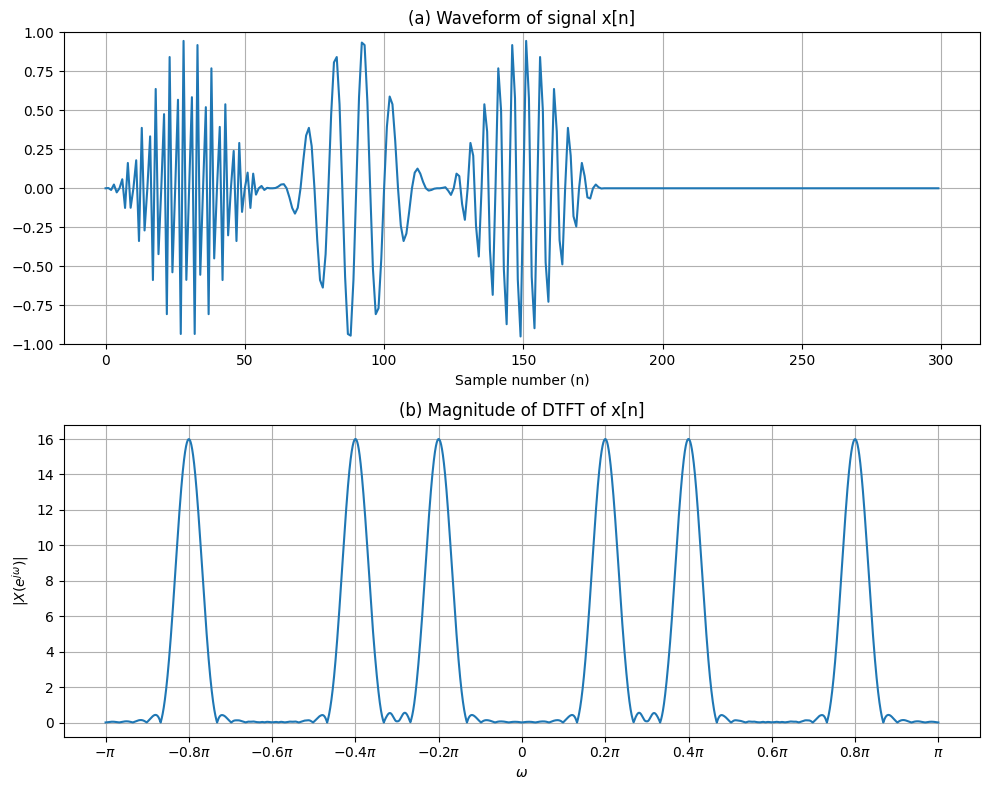

In [33]:
n = np.arange(300)

x1 = np.sin(0.8 * np.pi * n[:60]) * np.hanning(60)
x2 = np.sin(0.2 * np.pi * n[60:120]) * np.hanning(60)
x3 = np.sin(0.4 * np.pi * n[120:180]) * np.hanning(60)
x4 = np.zeros(120)
x = np.concatenate((x1, x2, x3, x4))

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(n, x)
plt.title("(a) Waveform of signal x[n]")
plt.xlabel("Sample number (n)")
plt.ylim(-1, 1)
plt.grid()

X = np.fft.fftshift(np.fft.fft(x, 44100))
plt.subplot(2, 1, 2)
plt.plot(omega, np.abs(X) / max(np.abs(X)) * 16)
plt.title("(b) Magnitude of DTFT of x[n]")
plt.xlabel("Frequency (ω)")
plt.ylabel(r'$|X(e^{j\omega})|$')
plt.xlabel(r"$\omega$")
plt.xticks(ticks=[-np.pi, -np.pi*0.8, -np.pi*0.6, -np.pi*0.4, -np.pi*0.2, 0, np.pi*0.2, np.pi*0.4, np.pi*0.6, np.pi*0.8, np.pi],
           labels=[r"$-\pi$", r"$-0.8\pi$", r"$-0.6\pi$", r"$-0.4\pi$", r"$-0.2\pi$", "0", r"$0.2\pi$", r"$0.4\pi$", r"$0.6\pi$", r"$0.8\pi$", r"$\pi$"])
plt.grid()
plt.tight_layout()
plt.show()


## 4. 將題目 3 產生的波形輸入至 LCCDE 來做 filtering

找出 $H(z)$ 的零點跟極點(zeros, poles)

要注意：因為 $H_2(z)$ 有平方，所以應該要有16個零點跟16個極點

$H_1(z)$ 的零點：

$$
z = 0.98e^{j0.8\pi}, \quad z = 0.98e^{-j0.8\pi}
$$

$H_1(z)$ 的極點：

$$
z = 0.8e^{j0.4\pi}, \quad z = 0.8e^{-j0.4\pi}
$$

$H_2(z)$ 的零點：

$$
z = \frac{1}{0.95} e^{-j(0.15\pi + 0.02\pi k)}, \quad 
z = \frac{1}{0.95} e^{j(0.15\pi + 0.02\pi k)}. \quad 
k = 1, 2, 3, 4
$$

$H_2(z)$ 的極點：

$$
z = 0.95 e^{j(0.15\pi + 0.02\pi k)}, \quad
z = 0.95 e^{-j(0.15\pi + 0.02\pi k)}. \quad
k = 1, 2, 3, 4
$$

`scipy.signal.zpk2tf(zeros, poles, gain)`的用法

參數：

- zeros: 零點（list 或 numpy array）
- poles: 極點（list 或 numpy array）
- gain: 增益（float 或 int）

return值：

- b: 函數分子的係數（numpy array）
- a: 函數分母的係數（numpy array）

`scipy.signal.lfilter(b, a, x, axis=-1, zi=None)`的用法

參數：

- b: 函數分子的係數（numpy array）
- a: 函數分母的係數（numpy array）
- x: 輸入信號，這裡是指第三題的x[n]（list 或 numpy array）
- axis (選填): 預設為 -1
- zi (選填): 預設為 None

return值：

- y: 經濾波後的信號

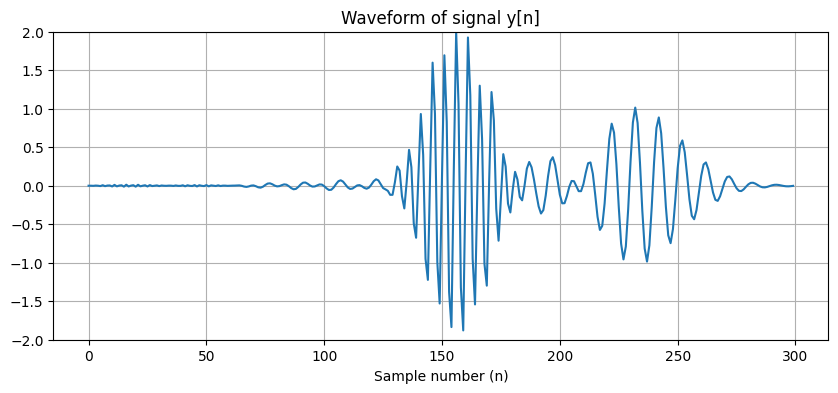

In [35]:
zeros = [
    0.98 * np.exp(1j * 0.8 * np.pi),
    0.98 * np.exp(-1j * 0.8 * np.pi),
    1/(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1))),
    1/(np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1)))),
    1/(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2))),
    1/(np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2)))),
    1/(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3))),
    1/(np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3)))),
    1/(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4))),
    1/(np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4)))),
    1/(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 1))),
    1/(np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 1)))),
    1/(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 2))),
    1/(np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 2)))),
    1/(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 3))),
    1/(np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 3)))),
    1/(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 4))),
    1/(np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 4))))
]
poles = [
    0.8 * np.exp(1j * 0.4 * np.pi),
    0.8 * np.exp(-1j * 0.4 * np.pi),
    0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1)),
    np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 1))),
    0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2)),
    np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 2))),
    0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3)),
    np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 3))),
    0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4)),
    np.conj(0.95 * np.exp(1j * (0.15 * np.pi + 0.02 * np.pi * 4))),
    0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 1)),
    np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 1))),
    0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 2)),
    np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 2))),
    0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 3)),
    np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 3))),
    0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 4)),
    np.conj(0.95 * np.exp(-1j * (0.15 * np.pi + 0.02 * np.pi * 4)))
]
gain = 1

b, a = zpk2tf(zeros, poles, gain)

y = lfilter(b, a, x)
y = y / np.max(np.abs(y)) * 2

plt.figure(figsize=(10, 4))
plt.plot(n, y)
plt.title("Waveform of signal y[n]")
plt.xlabel("Sample number (n)")
plt.ylim(-2, 2)
plt.grid()
plt.show()